# MIERUNE もくもく会 100回 🎉

[MIERUNE - Log](https://mierune.github.io/mierune-log/)

## 表のパース

In [1]:
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
def normalize_name(text):
    assert text.startswith("")
    assert text[0] in ("@", "＠"), text
    return " ".join([d.capitalize() for d in text[1:].lower().split()])

In [3]:
all_tables = []

for i in tqdm(range(1, 100+1)):
    url = f"https://mierune.github.io/mierune-log/posts/mokumoku-{i:03d}/"
    
    tables = pd.read_html(url)
    assert len(tables) == 2

    content_table = tables[1]
    assert content_table.columns.tolist() == ["参加者", "内容"]
    content_table["#"] = i    
    all_tables.append(content_table)

  0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
df_all = pd.concat(all_tables).reset_index(drop=True)
df_all["参加者"] = df_all["参加者"].apply(normalize_name)
df_all.fillna("", inplace=True)
df_all = df_all[["#", "参加者", "内容"]]
df_all

,#,参加者,内容
0,1,Yasunori Kirimoto,MIERUNEトレーニングをやってみる - QGIS編 -
1,1,Ryohei Abe,MIERUNEの認証をexpressで試す
2,1,Mitsuha Miyake,AWS Cloud Practitioner EssentialsのEラーニングやる
3,1,Ryo Yokoyama,6/24勉強会発表内容の改修 (ブラウザ上でpython実行/結果表示したい)
4,1,Satoru Nishio,Serverless Frameworkでジオイド高取得APIを作成したい
...,...,...,...
558,100,Hidekazu Takami,朝 LT 資料作成
559,100,Hajime Kato,BBQ の準備 🔥
560,100,Takayuki Kawajiri,FOSS4G FUKUI の CFP 考える
561,100,Yasunori Kirimoto,CFP & 次の英語記事


In [5]:
df_all.to_pickle("table.pickle")

In [6]:
df_all.to_csv("table.csv", index=False)

In [7]:
!head table.csv

#,参加者,内容
1,Yasunori Kirimoto,MIERUNEトレーニングをやってみる - QGIS編 -
1,Ryohei Abe,MIERUNEの認証をexpressで試す
1,Mitsuha Miyake,AWS Cloud Practitioner EssentialsのEラーニングやる
1,Ryo Yokoyama,6/24勉強会発表内容の改修 (ブラウザ上でpython実行/結果表示したい)
1,Satoru Nishio,Serverless Frameworkでジオイド高取得APIを作成したい
1,Kanahiro Iguchi,GO言語に入門
1,Norihiro Narayama,p5.jsで何か作る
2,Yasunori Kirimoto,MIERUNEトレーニングをやってみる - QGIS編 -
2,Ryohei Abe,AWSトレーニングの準備


In [8]:
df_all = pd.read_pickle("table.pickle")

## 人ごとのカウント

In [9]:
df_all.groupby("参加者").size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)

,参加者,count
0,Norihiro Narayama,92
1,Yasunori Kirimoto,76
2,Satoshi Komatsu,48
3,Ryohei Abe,36
4,Takayuki Kawajiri,35
5,Sorami Hisamoto,35
6,Hajime Kato,28
7,Raymond Lay,24
8,Mitsuha Miyake,24
9,Ryo Yokoyama,24


## 回ごとのカウント

In [10]:
df_all.groupby("#").size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)

,#,count
0,51,12
1,52,12
2,48,10
3,99,10
4,56,10
...,...,...
95,13,3
96,36,3
97,27,3
98,62,2


***

## 形態素解析

In [11]:
from sudachipy import tokenizer
from sudachipy import dictionary
tokenizer_obj = dictionary.Dictionary().create()

In [12]:
content_texts = df_all["内容"].tolist()

In [13]:
all_words = []
mode = tokenizer.Tokenizer.SplitMode.C
for text in content_texts:
    morphemes = tokenizer_obj.tokenize(text, mode)
    words = [m.surface() for m in morphemes if m.part_of_speech()[0] == "名詞"]
    all_words += words

## 単語カウント

In [14]:
from collections import Counter

In [15]:
counts = Counter(all_words)

In [16]:
df_counts = pd.DataFrame(counts.most_common(), columns=["word", "count"])
df_counts

,word,count
0,トレーニング,48
1,準備,38
2,QGIS,30
3,記事,23
4,js,22
...,...,...
618,記念,1
619,pystac,1
620,FUKUI,1
621,ログ,1


In [17]:
df_counts.head(10)

,word,count
0,トレーニング,48
1,準備,38
2,QGIS,30
3,記事,23
4,js,22
5,MIERUNE,20
6,編,20
7,AWS,19
8,FOSS,19
9,4,19


## ワードクラウドの描画

In [18]:
import matplotlib.pyplot as plt
import wordcloud

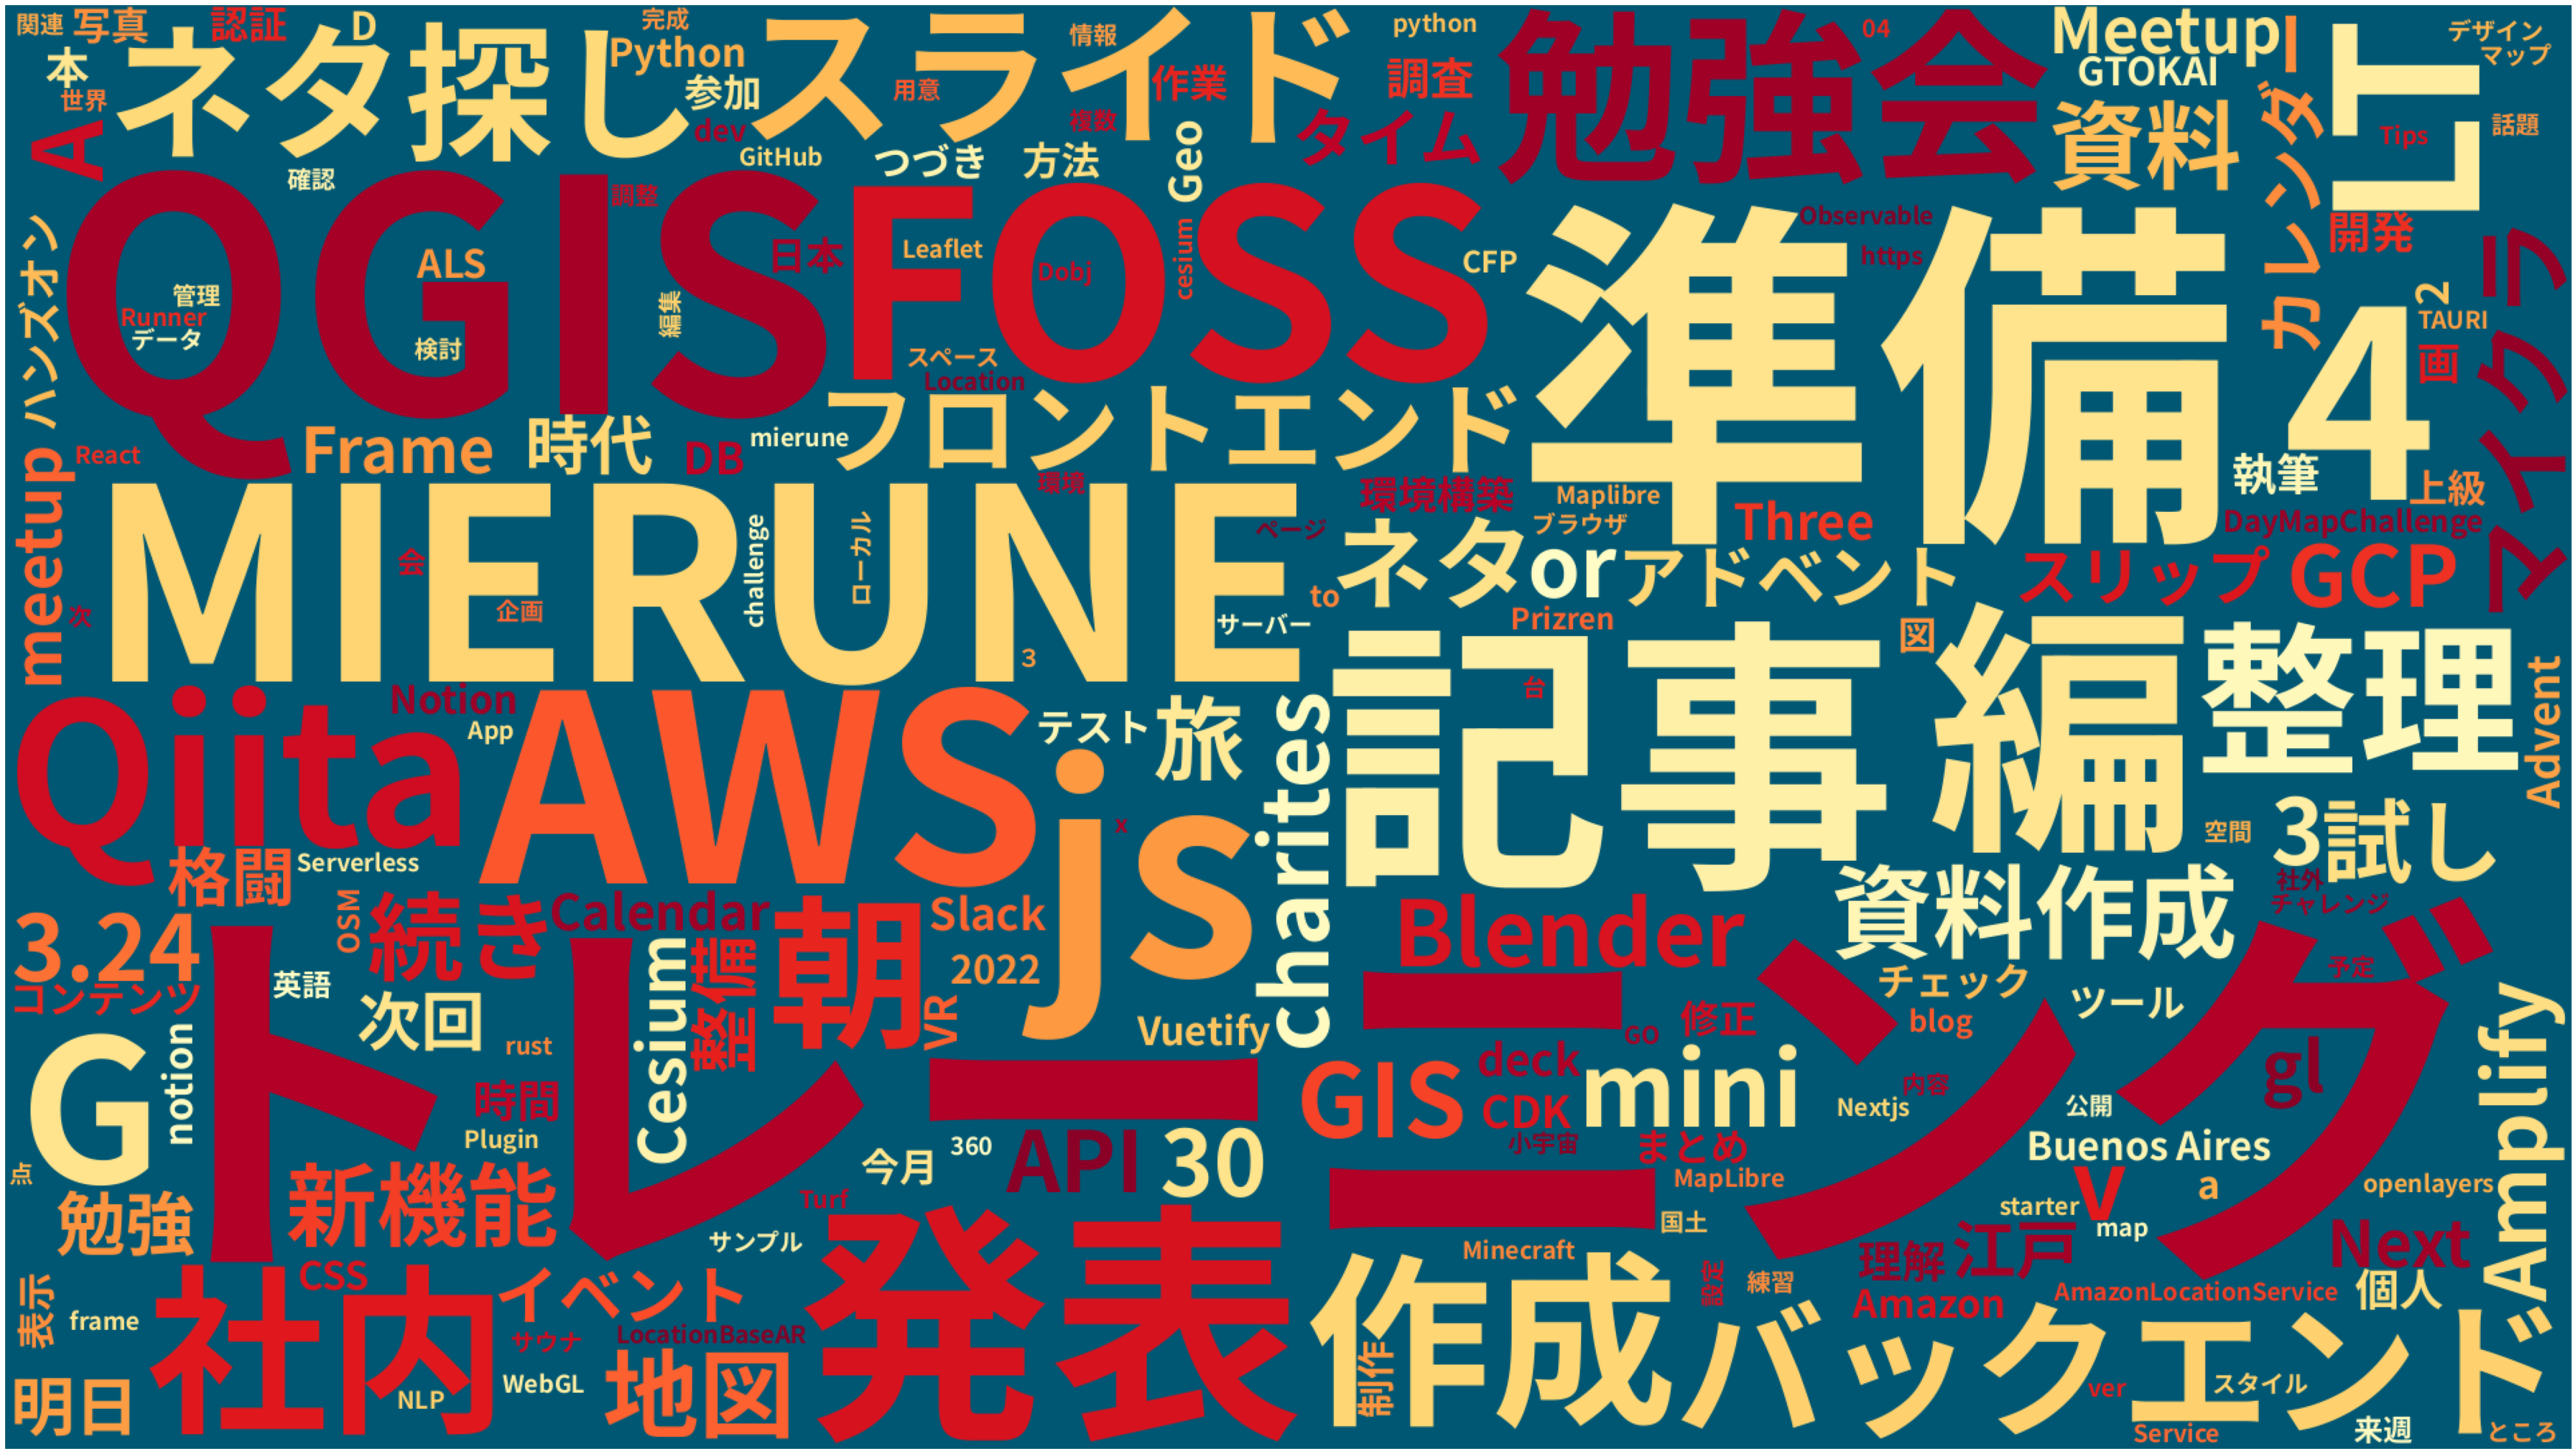

In [24]:
wc = wordcloud.WordCloud(
    background_color="#005773",
    font_path="NotoSansJP-Bold.ttf",
    colormap="YlOrRd",
    width=1920,
    height=1080
).generate_from_frequencies(counts)

plt.figure(figsize=(64, 36))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
wc = wordcloud.WordCloud(
    background_color="white",
    font_path="NotoSansJP-Bold.ttf",
    color_func=wordcloud.get_single_color_func("#005773"),
    width=1920,
    height=1080
).generate_from_frequencies(counts)

plt.figure(figsize=(64, 36))
plt.imshow(wc)
plt.axis("off")
plt.show()

### マスキング

In [20]:
from PIL import Image
import numpy as np

In [22]:
logo_mask = np.array(Image.open("./logo_mask.png"))

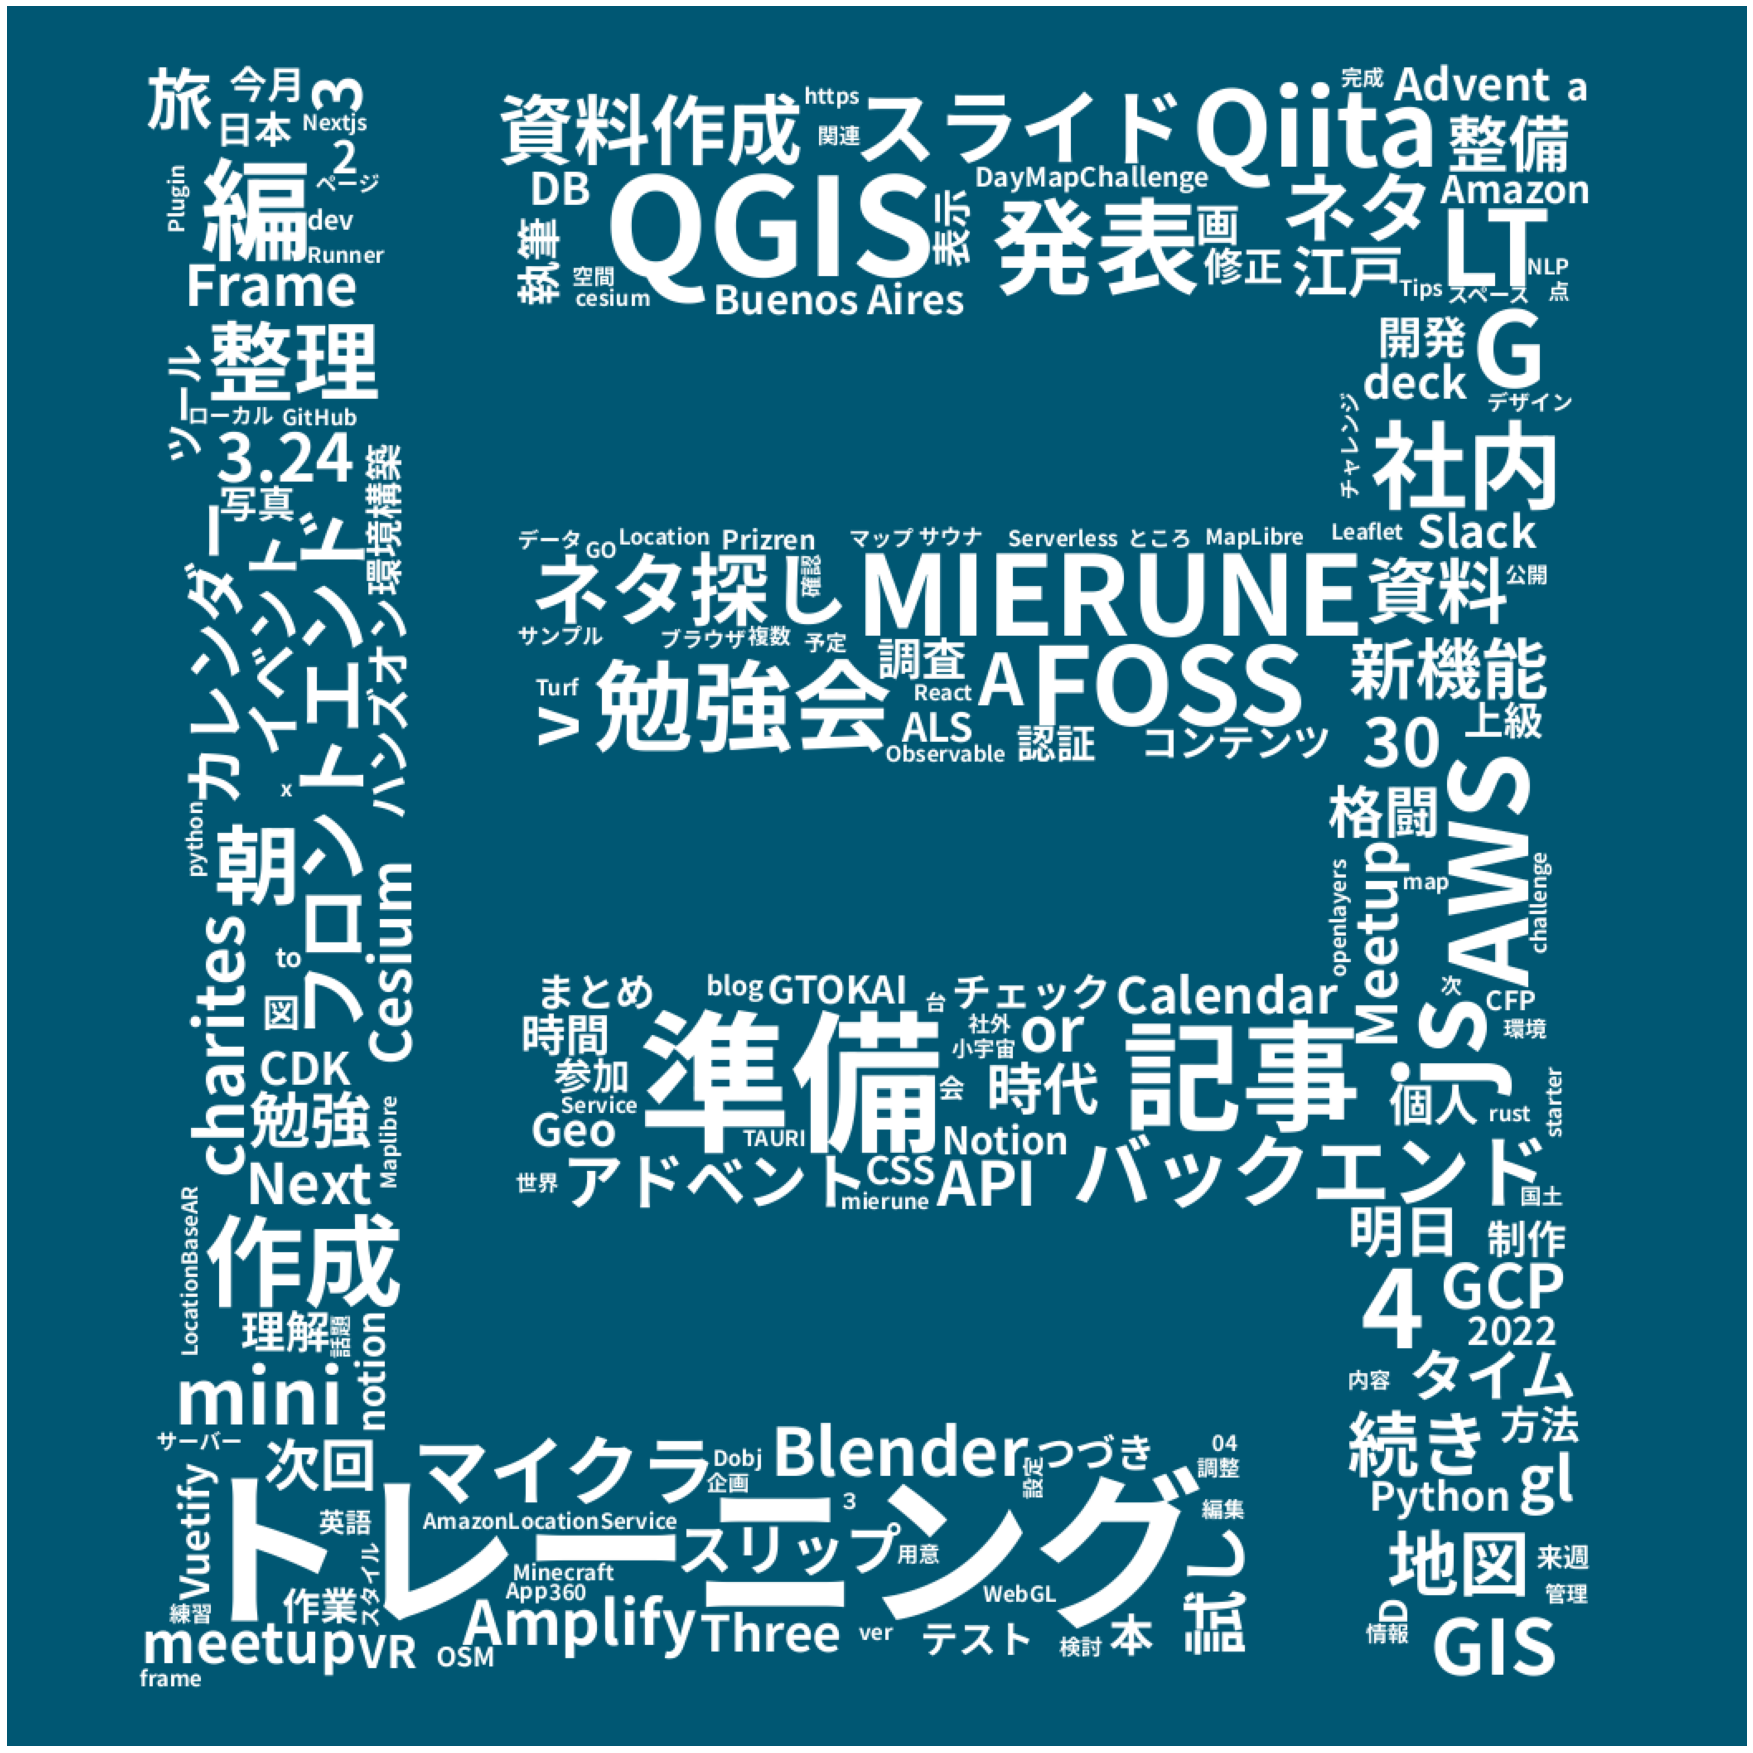

In [23]:
wc = wordcloud.WordCloud(
    background_color="#005773",
    font_path="NotoSansJP-Bold.ttf",
    color_func=lambda *args, **kwargs: "white",
    mask=logo_mask,
    width=1920,
    height=1920,
).generate_from_frequencies(counts)

plt.figure(figsize=(32, 32))
plt.imshow(wc)
plt.axis("off")
plt.show()